# **NOAA Weather Data Analysis - JFK Airport (New York)**
This notebook focuses on analyzing and forecasting weather patterns using the NOAA Weather Dataset collected from JFK Airport in New York. The dataset comprises 114,546 hourly observations of 12 key climatological variables, including temperature, wind speed, humidity, and pressure. This notebook teaches the user to extract, clean and analyze sample weather data and predict weather trends to help airports schedule better flight times.

The notebook is organized into three main parts:

---

## **Part 1: Data Cleaning**

In this section, we prepare the raw data for analysis by:

* Removing unnecessary or redundant columns to retain only relevant numerical features
* Converting data types and cleaning inconsistencies
* Handling missing values with appropriate filling strategies
* Encoding categorical weather features for downstream analysis

---

## **Part 2: Exploratory Data Analysis (EDA)**

Here, we perform visual and statistical exploration of the cleaned dataset:

* Load the cleaned data
* Generate insightful visualizations of key variables
* Identify trends, patterns, and seasonal effects in the time-series data

---

## **Part 3: Time Series Forecasting**

This section focuses on predicting future temperatures using time-series models:

* Load the cleaned and preprocessed data
* Establish baseline forecasting models
* Train and evaluate advanced statistical forecasting techniques

---

## **Part 1: Data Cleaning**

#### Download Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import kagglehub
import warnings

# Download latest version
path = kagglehub.dataset_download("mexwell/noaa-weather-data-jfk-airport",)

print("Path to dataset files:", path)

Path to dataset files: /Users/azhar/.cache/kagglehub/datasets/mexwell/noaa-weather-data-jfk-airport/versions/1


#### Load Raw Data

In [2]:
# Load Datasets
import os

os.listdir(path)

# Load Dataset
df = pd.read_csv(f"{path}/jfk_weather.csv")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

#Check the data
df.head()

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_86150/1988764122.py:7: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,20,22,23,25,40,63,64,67,68,69,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/jfk_weather.csv")


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPressureChange,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYAverageWetBulbTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYSunrise,DAILYSunset,DAILYWeather,DAILYPrecip,DAILYSnowfall,DAILYSnowDepth,DAILYAverageStationPressure,DAILYAverageSeaLevelPressure,DAILYAverageWindSpeed,DAILYPeakWindSpeed,PeakWindDirection,DAILYSustainedWindSpeed,DAILYSustainedWindDirection,MonthlyMaximumTemp,MonthlyMinimumTemp,MonthlyMeanTemp,MonthlyAverageRH,MonthlyDewpointTemp,MonthlyWetBulbTemp,MonthlyAvgHeatingDegreeDays,MonthlyAvgCoolingDegreeDays,MonthlyStationPressure,MonthlySeaLevelPressure,MonthlyAverageWindSpeed,MonthlyTotalSnowfall,MonthlyDeptFromNormalMaximumTemp,MonthlyDeptFromNormalMinimumTemp,MonthlyDeptFromNormalAverageTemp,MonthlyDeptFromNormalPrecip,MonthlyTotalLiquidPrecip,MonthlyGreatestPrecip,MonthlyGreatestPrecipDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowDepthDate,MonthlyDaysWithGT90Temp,MonthlyDaysWithLT32Temp,MonthlyDaysWithGT32Temp,MonthlyDaysWithLT0Temp,MonthlyDaysWithGT001Precip,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT1Snow,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureDate,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 00:51,FM-15,FEW:02 7 SCT:04 13 BKN:07 29,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33.0,0.6,32.0,0.1,31,-0.6,92.0,0.0,000,NaN,29.97,8.0,NaN,29.99,0.01,29.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719,1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 01:00,FM-12,NaN,5.59,||PL:79,33.0,0.6,32.0,0.1,31,-0.6,92.0,0.0,000,NaN,29.96,8.0,+0.05,29.99,NaN,NaN,34.0,30.0,32.0,-1.7,NaN,NaN,NaN,33.0,0.0,719,1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 01:51,FM-15,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33.0,0.6,33.0,0.3,32,0.0,96.0,0.0,000,NaN,29.97,NaN,NaN,29.99,0.02,29.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719,1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 02:03,FM-16,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 BR:1 |RA:61 |RA:61,34.0,1.0,33.0,0.7,32,0.0,93.0,0.0,000,NaN,29.97,NaN,NaN,NaN,T,29.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719,1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:94789,JFK INTER

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114545 entries, 0 to 114544
Data columns (total 90 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   STATION                            114545 non-null  object 
 1   STATION_NAME                       114545 non-null  object 
 2   ELEVATION                          114545 non-null  float64
 3   LATITUDE                           114545 non-null  float64
 4   LONGITUDE                          114545 non-null  float64
 5   DATE                               114545 non-null  object 
 6   REPORTTPYE                         114545 non-null  object 
 7   HOURLYSKYCONDITIONS                93335 non-null   object 
 8   HOURLYVISIBILITY                   96464 non-null   object 
 9   HOURLYPRSENTWEATHERTYPE            19974 non-null   object 
 10  HOURLYDRYBULBTEMPF                 111405 non-null  object 
 11  HOURLYDRYBULBTEMPC                 1114

#### Select only Hourly Columns

In [4]:
# Select only columns related to hourly data
hourly_cols = [col for col in df.columns if 'hourly' in col.lower()] + ['DATE']
hourly_data = df[hourly_cols].copy()

# Set DATE as index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data.DATE)).drop(columns=['DATE'])

hourly_data.head()

,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPressureChange,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,,,,,,,,
2010-01-01 00:51:00,FEW:02 7 SCT:04 13 BKN:07 29,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33.0,0.6,32.0,0.1,31,-0.6,92.0,0.0,000,NaN,29.97,8.0,NaN,29.99,0.01,29.99
2010-01-01 01:00:00,NaN,5.59,||PL:79,33.0,0.6,32.0,0.1,31,-0.6,92.0,0.0,000,NaN,29.96,8.0,+0.05,29.99,NaN,NaN
2010-01-01 01:51:00,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33.0,0.6,33.0,0.3,32,0.0,96.0,0.0,000,NaN,29.97,NaN,NaN,29.99,0.02,29.99
2010-01-01 02:03:00,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 BR:1 |RA:61 |RA:61,34.0,1.0,33.0,0.7,32,0.0,93.0,0.0,000,NaN,29.97,NaN,NaN,NaN,T,29.99
2010-01-01 02:28:00,BKN:07 7 BKN:07 15 OVC:08 35,5.00,-RA:02 BR:1 |RA:61 |RA:61,34.0,1.0,33.0,0.7,32,0.0,93.0,0.0,000,NaN,29.97,NaN,NaN,NaN,T,29.99


In [5]:
unness_cols = [
    'HOURLYSKYCONDITIONS', 
    'HOURLYPRSENTWEATHERTYPE',
    'HOURLYDRYBULBTEMPC', 
    'HOURLYWETBULBTEMPC', 
    'HOURLYWindGustSpeed',
    'HOURLYPressureChange',
    'HOURLYDewPointTempC'
    ]

# Select only numeric columns
hourly_data = hourly_data.drop(columns=unness_cols)

hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   object 
 1   HOURLYDRYBULBTEMPF      111405 non-null  object 
 2   HOURLYWETBULBTEMPF      111247 non-null  object 
 3   HOURLYDewPointTempF     111397 non-null  object 
 4   HOURLYRelativeHumidity  111397 non-null  object 
 5   HOURLYWindSpeed         111358 non-null  object 
 6   HOURLYWindDirection     111237 non-null  object 
 7   HOURLYStationPressure   111256 non-null  object 
 8   HOURLYPressureTendency  48038 non-null   float64
 9   HOURLYSeaLevelPressure  99522 non-null   object 
 10  HOURLYPrecip            79763 non-null   object 
 11  HOURLYAltimeterSetting  86878 non-null   object 
dtypes: float64(1), object(11)
memory usage: 11.4+ MB


#### Clean up Unexpected Values

In [6]:
# Function to check unexpected values in object columns
def audit_garbage(df):
    found_garbage = False

    for col in df.select_dtypes(include=['object']).columns:
        numeric_attempts = pd.to_numeric(df[col], errors='coerce').isna()

        bad_mask = numeric_attempts & df[col].notna()

        if bad_mask.any():
            found_garbage = True
            unique_garbage = df.loc[bad_mask, col].unique()

            print(f"{col} contains: {unique_garbage}")
        if not found_garbage:
            print("No garbage values found.")

# Apply function
audit_garbage(hourly_data)

HOURLYVISIBILITY contains: ['2.50V' '3.00V' '0.75V' '1.00V' '2.00V' '1.50V' '0.25V' '1.75V' '0.00V'
 '0.12V' '0.50V' '1.25V' '0.12s' '0.50s']
HOURLYDRYBULBTEMPF contains: ['72s' '78s' '*']
HOURLYWETBULBTEMPF contains: ['*']
HOURLYDewPointTempF contains: ['-7s' '41s' '21s' '22s' '40s' '-6s' '42s' '23s' '-17s' '-22s' '35s' '55s'
 '7s' '24s' '30s' '36s' '34s' '68s' '*']
HOURLYRelativeHumidity contains: ['*']
HOURLYWindSpeed contains: ['31s']
HOURLYWindDirection contains: ['VRB']
HOURLYStationPressure contains: ['29.00s' '29.57s' '29.39s' '29.58s' '29.89s' '29.46s' '28.71s' '29.53s'
 '29.69s' '29.40s' '29.34s' '29.73s' '28.51s' '29.12s' '29.13s' '29.14s'
 '29.15s' '29.16s' '29.17s' '29.49s' '29.51s' '29.55s' '29.38s' '29.41s'
 '30.00s' '29.61s' '29.43s' '29.37s' '29.06s' '29.04s' '29.20s' '29.22s'
 '29.19s' '28.89s' '28.91s' '28.95s' '28.97s' '28.98s' '29.21s' '29.86s']
HOURLYSeaLevelPressure contains: ['29.02s' '29.60s' '28.74s' '28.59s' '29.14s' '29.16s' '29.18s' '29.19s'
 '29.27s' '29.4

In [7]:
# Remove unexpected values and convert to numeric
hourly_data = hourly_data.replace(to_replace=['*', 'T', '0.020.01s'], value=[np.nan, 0.00, np.nan])

for i in hourly_data.columns:
    hourly_data[i] = (hourly_data[i]
                      .astype('str')
                      .str.replace('[^0-9.-]', '', regex=True))
    hourly_data[i] = pd.to_numeric(hourly_data[i], errors='coerce')

In [8]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   float64
 1   HOURLYDRYBULBTEMPF      111403 non-null  float64
 2   HOURLYWETBULBTEMPF      111245 non-null  float64
 3   HOURLYDewPointTempF     111395 non-null  float64
 4   HOURLYRelativeHumidity  111395 non-null  float64
 5   HOURLYWindSpeed         111358 non-null  float64
 6   HOURLYWindDirection     110444 non-null  float64
 7   HOURLYStationPressure   111256 non-null  float64
 8   HOURLYPressureTendency  48038 non-null   float64
 9   HOURLYSeaLevelPressure  99522 non-null   float64
 10  HOURLYPrecip            79762 non-null   float64
 11  HOURLYAltimeterSetting  86878 non-null   float64
dtypes: float64(12)
memory usage: 11.4 MB
None


,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,0.0,29.97,8.0,29.99,0.01,29.99
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.96,8.0,29.99,NaN,NaN
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.97,NaN,29.99,0.02,29.99
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.97,NaN,NaN,0.00,29.99
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.97,NaN,NaN,0.00,29.99


#### Reformat and Process Data

In [9]:
hourly_data.describe()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
count,96464.000000,111403.000000,111245.000000,111395.000000,111395.000000,111358.000000,110444.000000,111256.000000,48038.000000,99522.000000,79762.000000,86878.000000
mean,8.758806,55.310611,49.703097,43.309197,67.132142,11.268045,192.511590,29.990639,4.388963,30.026194,0.007032,30.009537
std,2.742651,17.169744,16.062113,19.357060,20.278571,6.175006,107.606516,0.238452,2.741795,0.233693,0.042636,0.239821
min,0.000000,1.000000,-1.000000,-22.000000,8.000000,0.000000,0.000000,28.490000,0.000000,28.540000,0.000000,28.510000
25%,9.940000,42.000000,37.000000,29.000000,51.000000,7.000000,110.000000,29.850000,2.000000,29.880000,0.000000,29.870000
50%,10.000000,56.000000,50.000000,45.000000,69.000000,10.000000,200.000000,29.990000,5.000000,30.020000,0.000000,30.010000
75%,10.000000,70.000000,64.000000,60.000000,85.000000,15.000000,280.000000,30.140000,7.000000,30.170000,0.000000,30.160000
max,99.420000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,8.000000,30.850000,2.410000,30.850000


According to the documentation, the HOURLYPressureTendency field should be an integer value in the range [0, 8]. Let's check if this condition holds for this dataset.

In [10]:
# Check if categorical variable HOURLYPressureTendency has values outside expected range
cond = (hourly_data['HOURLYPressureTendency'] < 0) | (hourly_data['HOURLYPressureTendency'] > 8)
print(f"Number of Hourly Pressure data outside expected range (0-8): {len(hourly_data[cond])}")

Number of Hourly Pressure data outside expected range (0-8): 0


In [11]:
# Check if categorical variable HOURLYVISIBILITY has values outside expected range
cond = (hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)
print(f"Number of Hourly Visibility data outside expected range (0-10): {len(hourly_data[cond])}")

hourly_data.loc[cond, 'HOURLYVISIBILITY'] = np.nan

Number of Hourly Visibility data outside expected range (0-10): 2


In [12]:
# Make sure time index is sorted and increasing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [13]:
# Reset index
hourly_data.reset_index(inplace=True)

In [14]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114545 entries, 0 to 114544
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    114545 non-null  datetime64[ns]
 1   HOURLYVISIBILITY        96462 non-null   float64       
 2   HOURLYDRYBULBTEMPF      111403 non-null  float64       
 3   HOURLYWETBULBTEMPF      111245 non-null  float64       
 4   HOURLYDewPointTempF     111395 non-null  float64       
 5   HOURLYRelativeHumidity  111395 non-null  float64       
 6   HOURLYWindSpeed         111358 non-null  float64       
 7   HOURLYWindDirection     110444 non-null  float64       
 8   HOURLYStationPressure   111256 non-null  float64       
 9   HOURLYPressureTendency  48038 non-null   float64       
 10  HOURLYSeaLevelPressure  99522 non-null   float64       
 11  HOURLYPrecip            79762 non-null   float64       
 12  HOURLYAltimeterSetting  86878 

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
0,2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,0.0,29.97,8.0,29.99,0.01,29.99
1,2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.96,8.0,29.99,NaN,NaN
2,2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.97,NaN,29.99,0.02,29.99
3,2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.97,NaN,NaN,0.00,29.99
4,2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.97,NaN,NaN,0.00,29.99


----

#### **Feature Encoding**

The final pre-processing step we will perform will be to handle two of our columns in a special way in order to correctly encode these features. They are:

* **HOURLYWindDirection** - wind direction
* **HOURLYPressureTendency** - an indicator of pressure changes

For HOURLYWindDirection, we encode the raw feature value as two new values, which measure the cyclical nature of wind direction - that is, we are encoding the compass-point nature of wind direction measurements.

In [15]:
# Transform HOURLYWindDirection into a cyclical variable using sin and cos transforms
hourly_data['HOURLYWindDirectionSin'] = np.sin(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data['HOURLYWindDirectionCos'] = np.cos(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data.drop(['HOURLYWindDirection'], axis=1, inplace=True)

For HOURLYPressureTendency, the feature value is in fact a categorical feature with three levels:

* 0-3 indicates an increase in pressure over the previous 3 hours
* 4 indicates no change during the previous 3 hours
* 5-8 indicates a decrease over the previous 3 hours Hence, we encode this feature into 3 dummy values representing these 3 potential states.

In [16]:
# Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

#### **Rename Columns**
Before saving the cleaned data, we will rename the columns to make them easier to read and work with.

In [17]:
# New columns names
columns_new_name = [
    'DATE',
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

renamed_hourly_data = hourly_data.rename(columns=columns_name_map)
renamed_hourly_data = renamed_hourly_data.set_index('DATE')

In [18]:
print(renamed_hourly_data.info())
renamed_hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   visibility               96462 non-null   float64
 1   dry_bulb_temp_f          111403 non-null  float64
 2   wet_bulb_temp_f          111245 non-null  float64
 3   dew_point_temp_f         111395 non-null  float64
 4   relative_humidity        111395 non-null  float64
 5   wind_speed               111358 non-null  float64
 6   station_pressure         111256 non-null  float64
 7   sea_level_pressure       99522 non-null   float64
 8   precip                   79762 non-null   float64
 9   altimeter_setting        86878 non-null   float64
 10  wind_direction_sin       110444 non-null  float64
 11  wind_direction_cos       110444 non-null  float64
 12  pressure_tendency_incr   114545 non-null  float32
 13  pressure_tendency_decr   

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0.0,1.0,0.0
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.96,29.99,NaN,NaN,0.0,1.0,0.0,1.0,0.0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0.0,0.0,0.0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.97,NaN,0.00,29.99,0.0,1.0,0.0,0.0,0.0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.97,NaN,0.00,29.99,0.0,1.0,0.0,0.0,0.0


In [19]:
import sys
# General summary of dataset
print("--- Dataset General Summary ---")
print(f"# of megabytes held by dataframe: {round(sys.getsizeof(renamed_hourly_data)/1e6, 2)} MB")
print(f"# of features: {len(renamed_hourly_data.columns)} columns")
print(f"# of observations: {renamed_hourly_data.shape[0]} rows")
print(f"Start date: {renamed_hourly_data.index[0].date()}")
print(f"End date: {renamed_hourly_data.index[-1].date()}")
print(f"# of days: {(renamed_hourly_data.index[-1] - renamed_hourly_data.index[0]).days} days")
print(f"# of months: {round((renamed_hourly_data.index[-1] - renamed_hourly_data.index[0]).days/30, 2)} months")
print(f"# of years: {round((renamed_hourly_data.index[-1] - renamed_hourly_data.index[0]).days/365, 2)} years")

--- Dataset General Summary ---
# of megabytes held by dataframe: 13.29 MB
# of features: 15 columns
# of observations: 114545 rows
Start date: 2010-01-01
End date: 2018-07-27
# of days: 3129 days
# of months: 104.3 months
# of years: 8.57 years


#### **Save Dataset**

In [20]:
renamed_hourly_data.to_csv("jfk_weather_cleaned.csv", float_format='%g')

---

## Part 2: Exploratory Data Analysis (EDA)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 160

In [22]:
# Shorten the name for easier use
data = renamed_hourly_data.copy()

In [23]:
data.head()

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0.0,1.0,0.0
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.96,29.99,NaN,NaN,0.0,1.0,0.0,1.0,0.0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0.0,0.0,0.0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.97,NaN,0.00,29.99,0.0,1.0,0.0,0.0,0.0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.97,NaN,0.00,29.99,0.0,1.0,0.0,0.0,0.0


#### **Visualize the Data**

#### Quick Peek at the Data 

We first visualize all the data we have to get a rough idea about how the data looks like.
As we can see in the plot below, the hourly `temperatures` follow a clear seasonal trend. 
`Wind speed`, `pressure`, `humidity` and `precipitation` data seem to have much higher variance and randomness.
It might be more meaningful to make a model to predict temperature, rather than some of the other more noisy data columns.

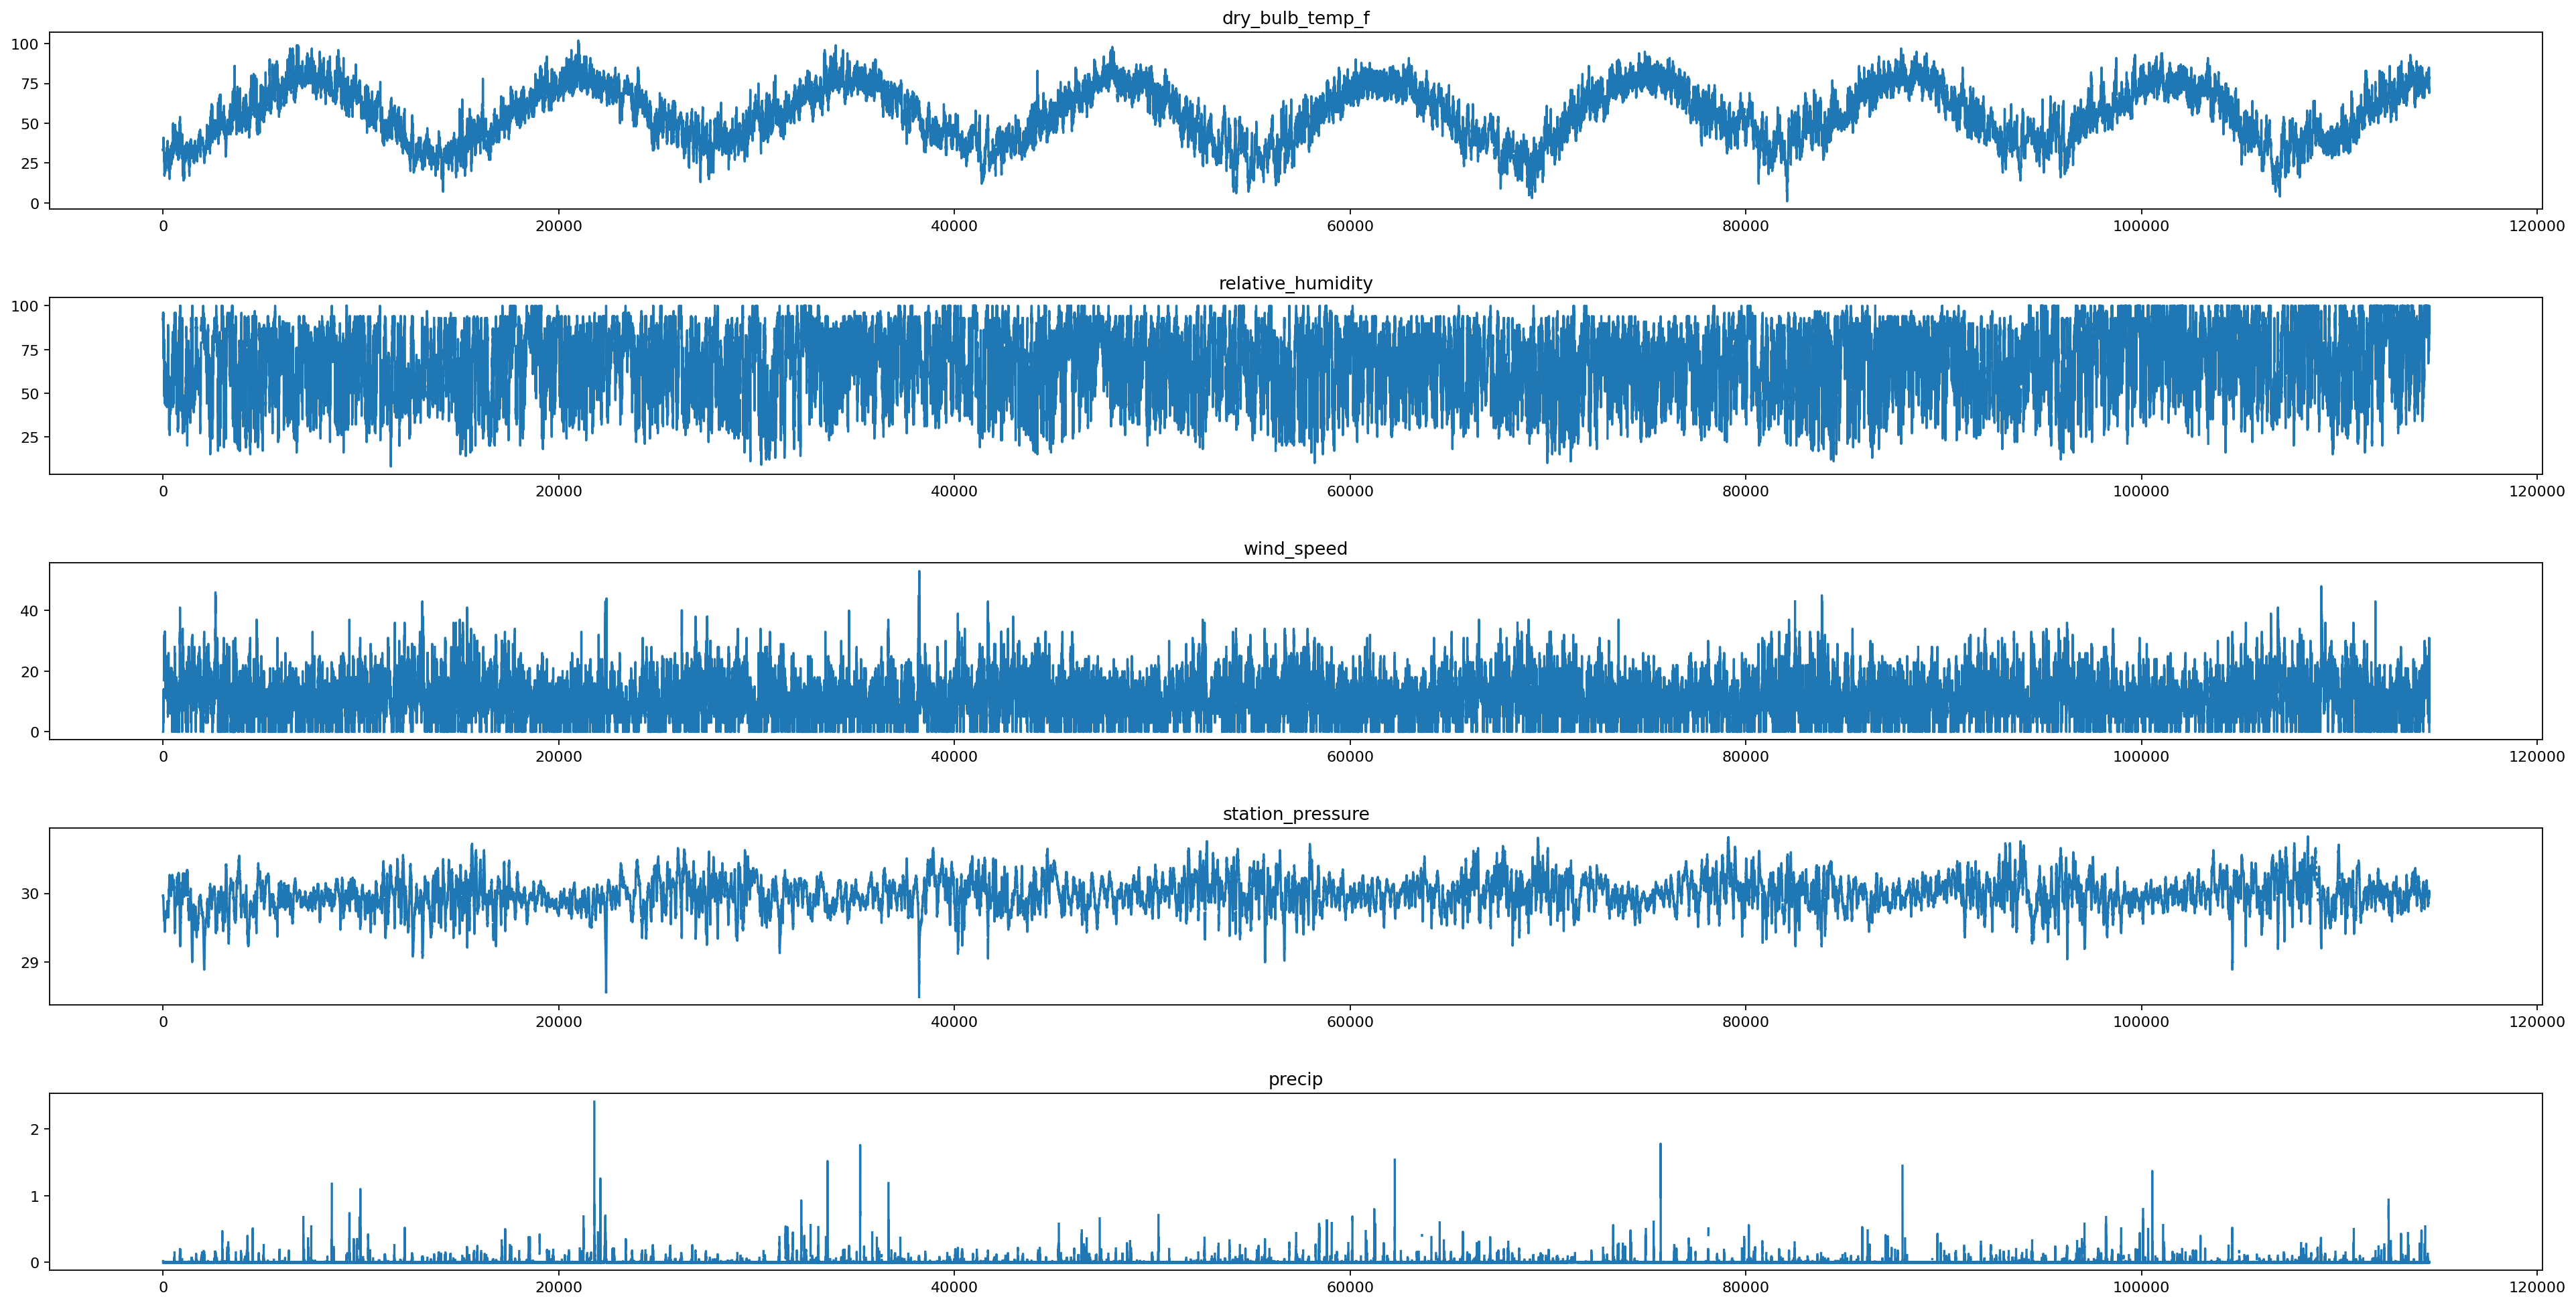

In [24]:
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']

plt.figure(figsize=(30,15))

for i, col in enumerate(plot_cols):
    plt.subplot(len(plot_cols), 1, i+1)
    plt.plot(data[col].values)
    plt.title(col)
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Feature Dependencies

Now we explore how the features (columns) of our data are related to each other. This helps in deciding which features to use when modelling a classifier or regresser. We ideally want independent features to be classified independently and likewise dependent features to be contributing to the same model.

We can see from the correlation plots how some features are somewhat correlated and could be used as additional data (perhaps for augmenting) when training a classifier.

<Axes: >

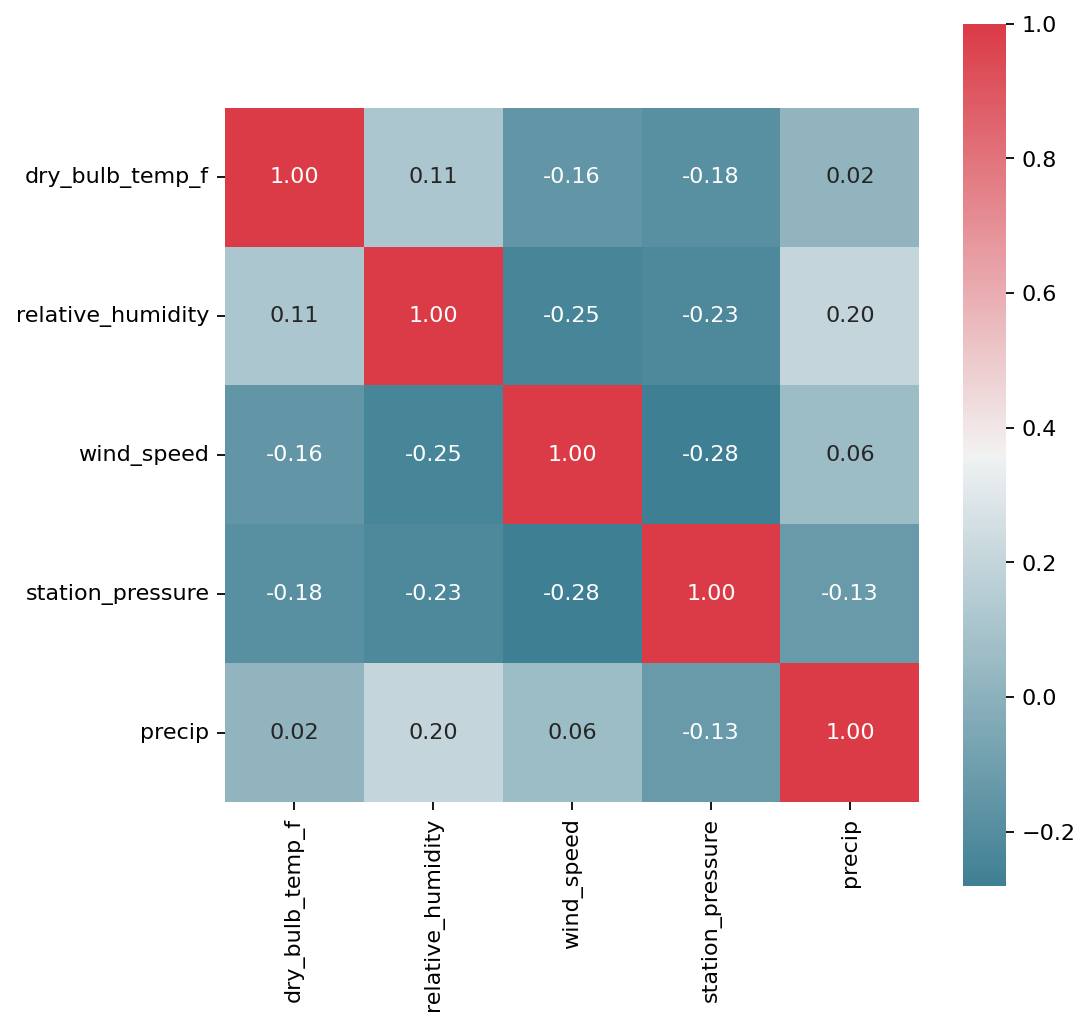

In [25]:
fig, ax = plt.subplots(figsize=(7,7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype='bool'), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax, annot=True, fmt=".2f")

Additionally we also visualize the joint distrubitions in the form of pairplots/scatter plots to see (qualitatively) the way in which these features are related in more detail over just the correlation. They are essentially 2D joint distributions in the case of off-diagonal subplots and the histogram (an approximation to the probability distribution) in case of the diagonal subplots.

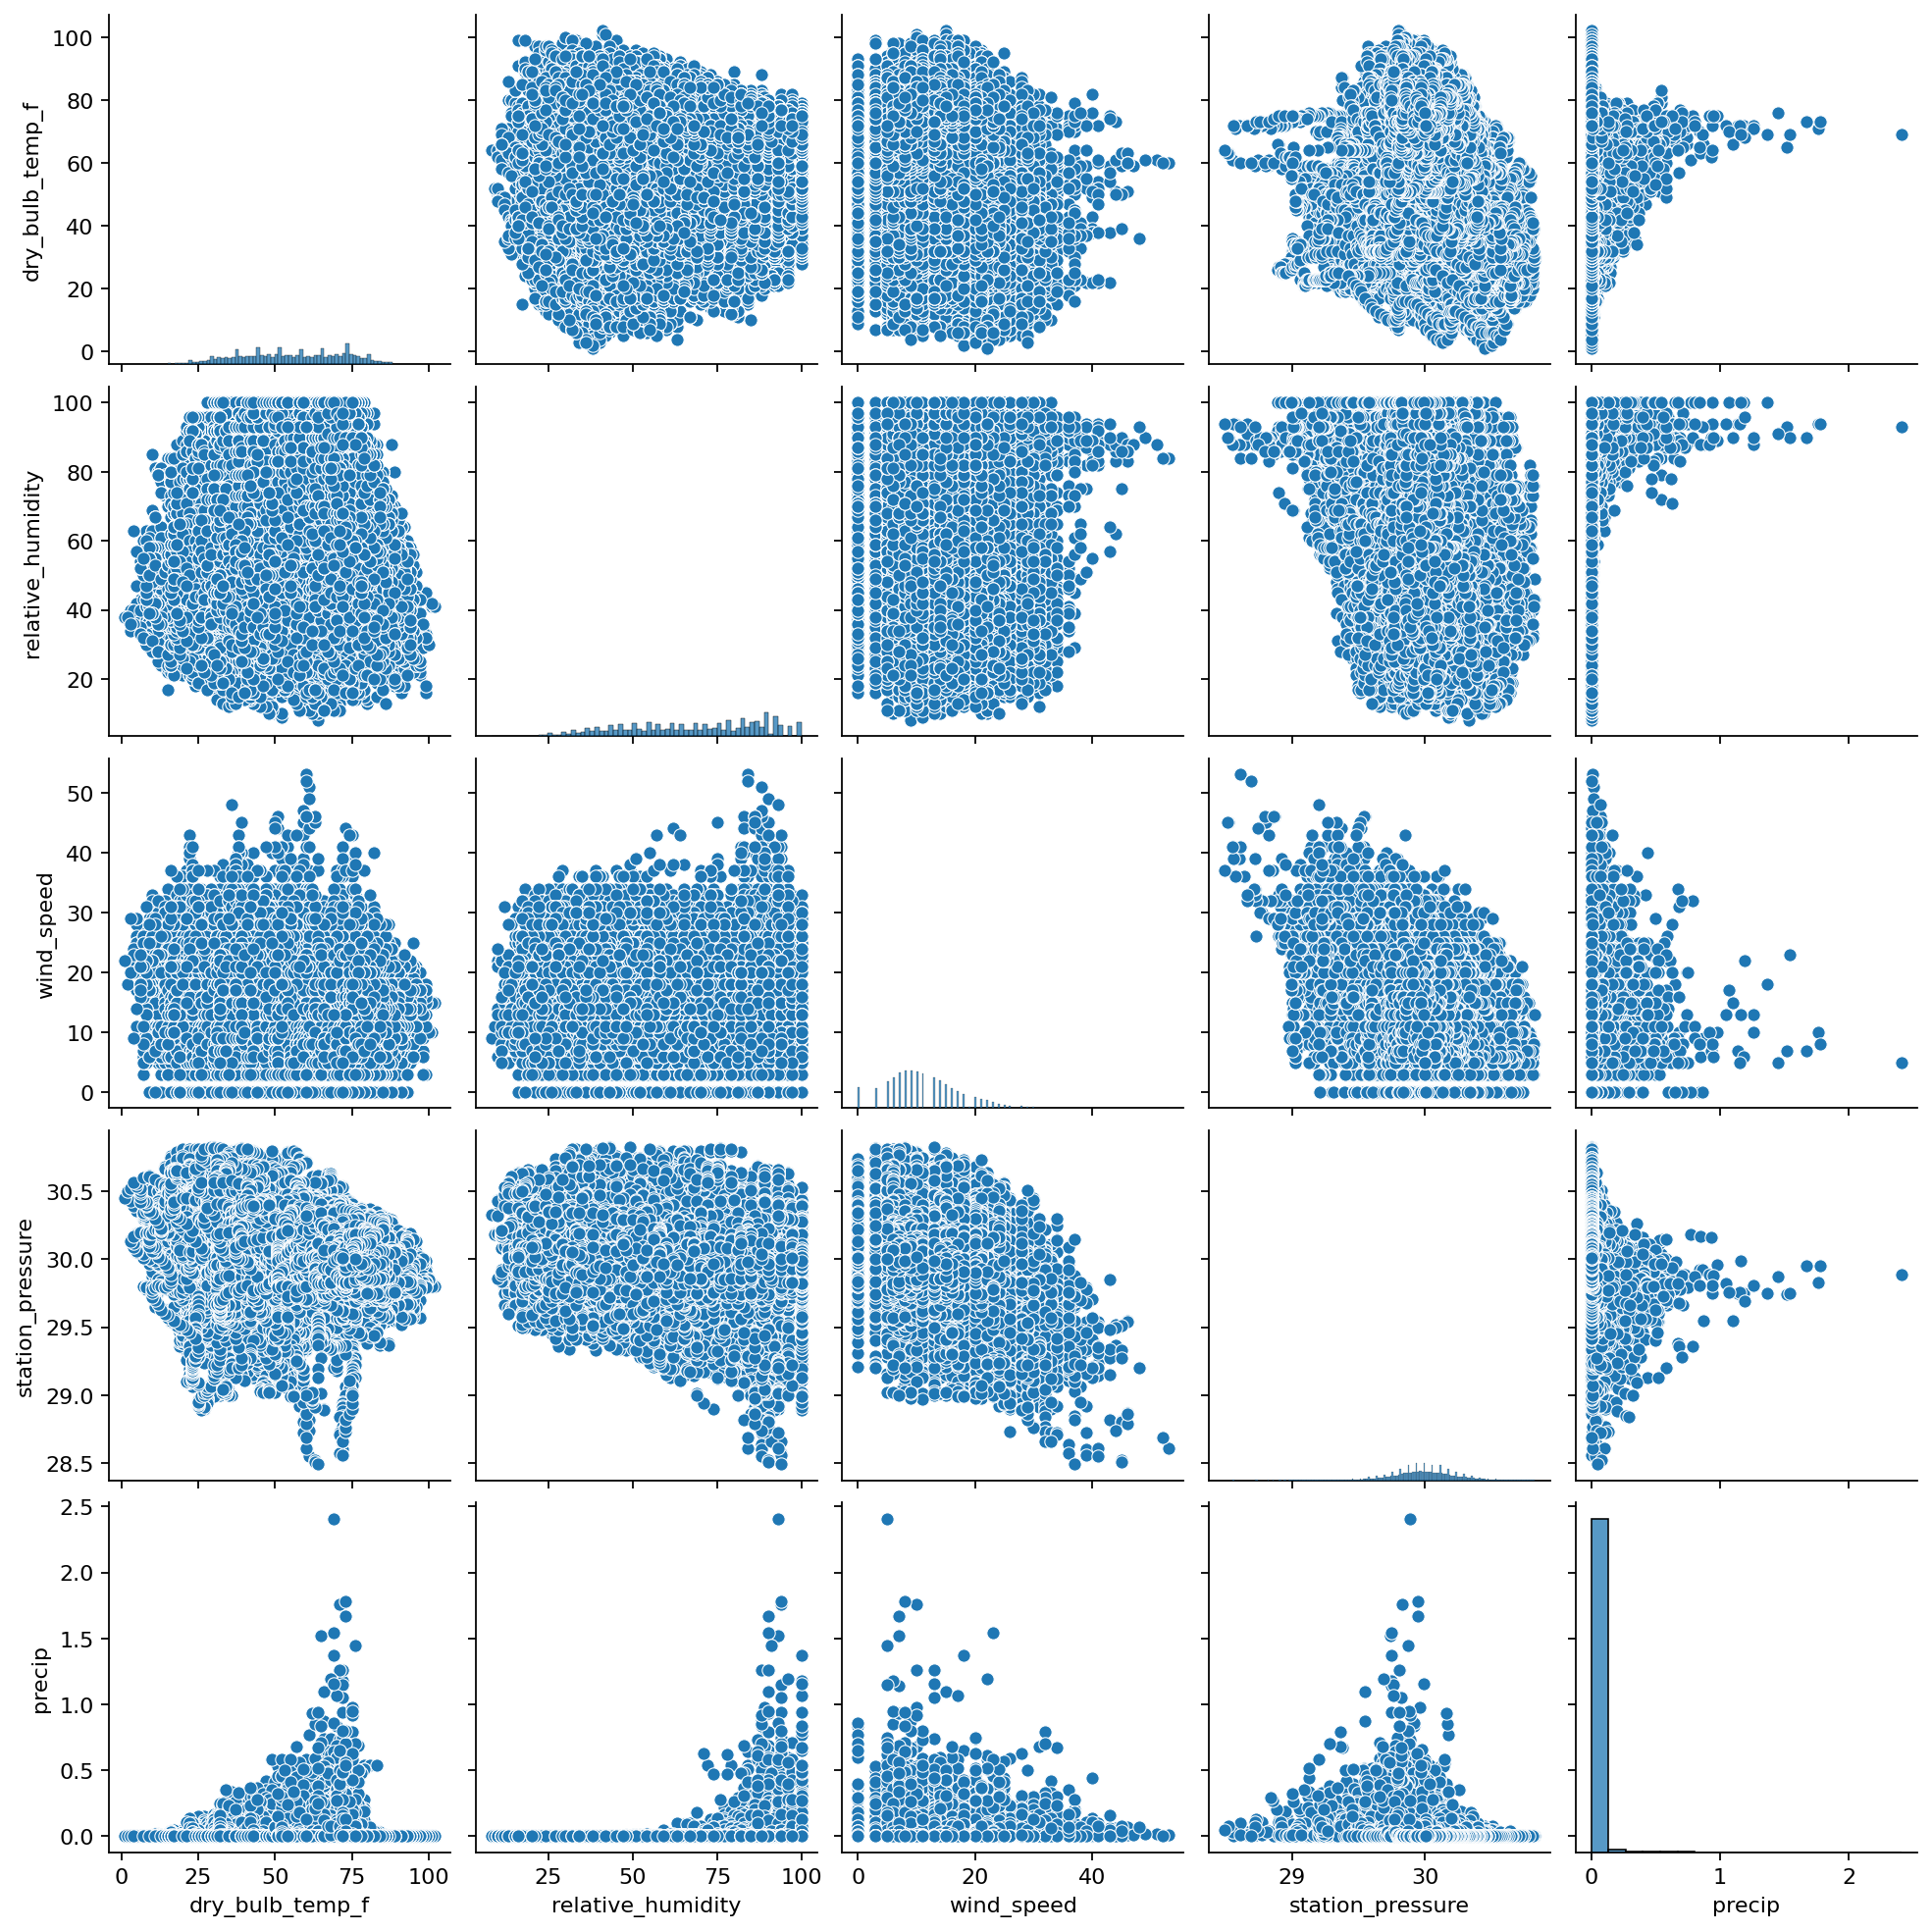

In [26]:
sns.pairplot(data[plot_cols])

#### Analyze Trends in the Data

Now that we have explored the whole dataset and the features on a high level, let us focus on one particular feature - `dry_bulb_temp_f`, the dry bub temperature in degrees Fahrenheit. this is what we mean when we refer to "air temperature". This is the most common feature in temperature prediction, and here we explore it in further detail.

We first start with plotting the data for all 9 years in monthly buckets then drill down to a single year to notice (qualitatively) the overall trend in the data. We can see from the plots that every year has roughly a sinousoidal nature to the temperature with some anomalies around 2013-2014. Upon further drilling down we see that each year's data is not the smooth sinousoid but rather a jagged and noisy one. But the overall trend still is a sinousoid.

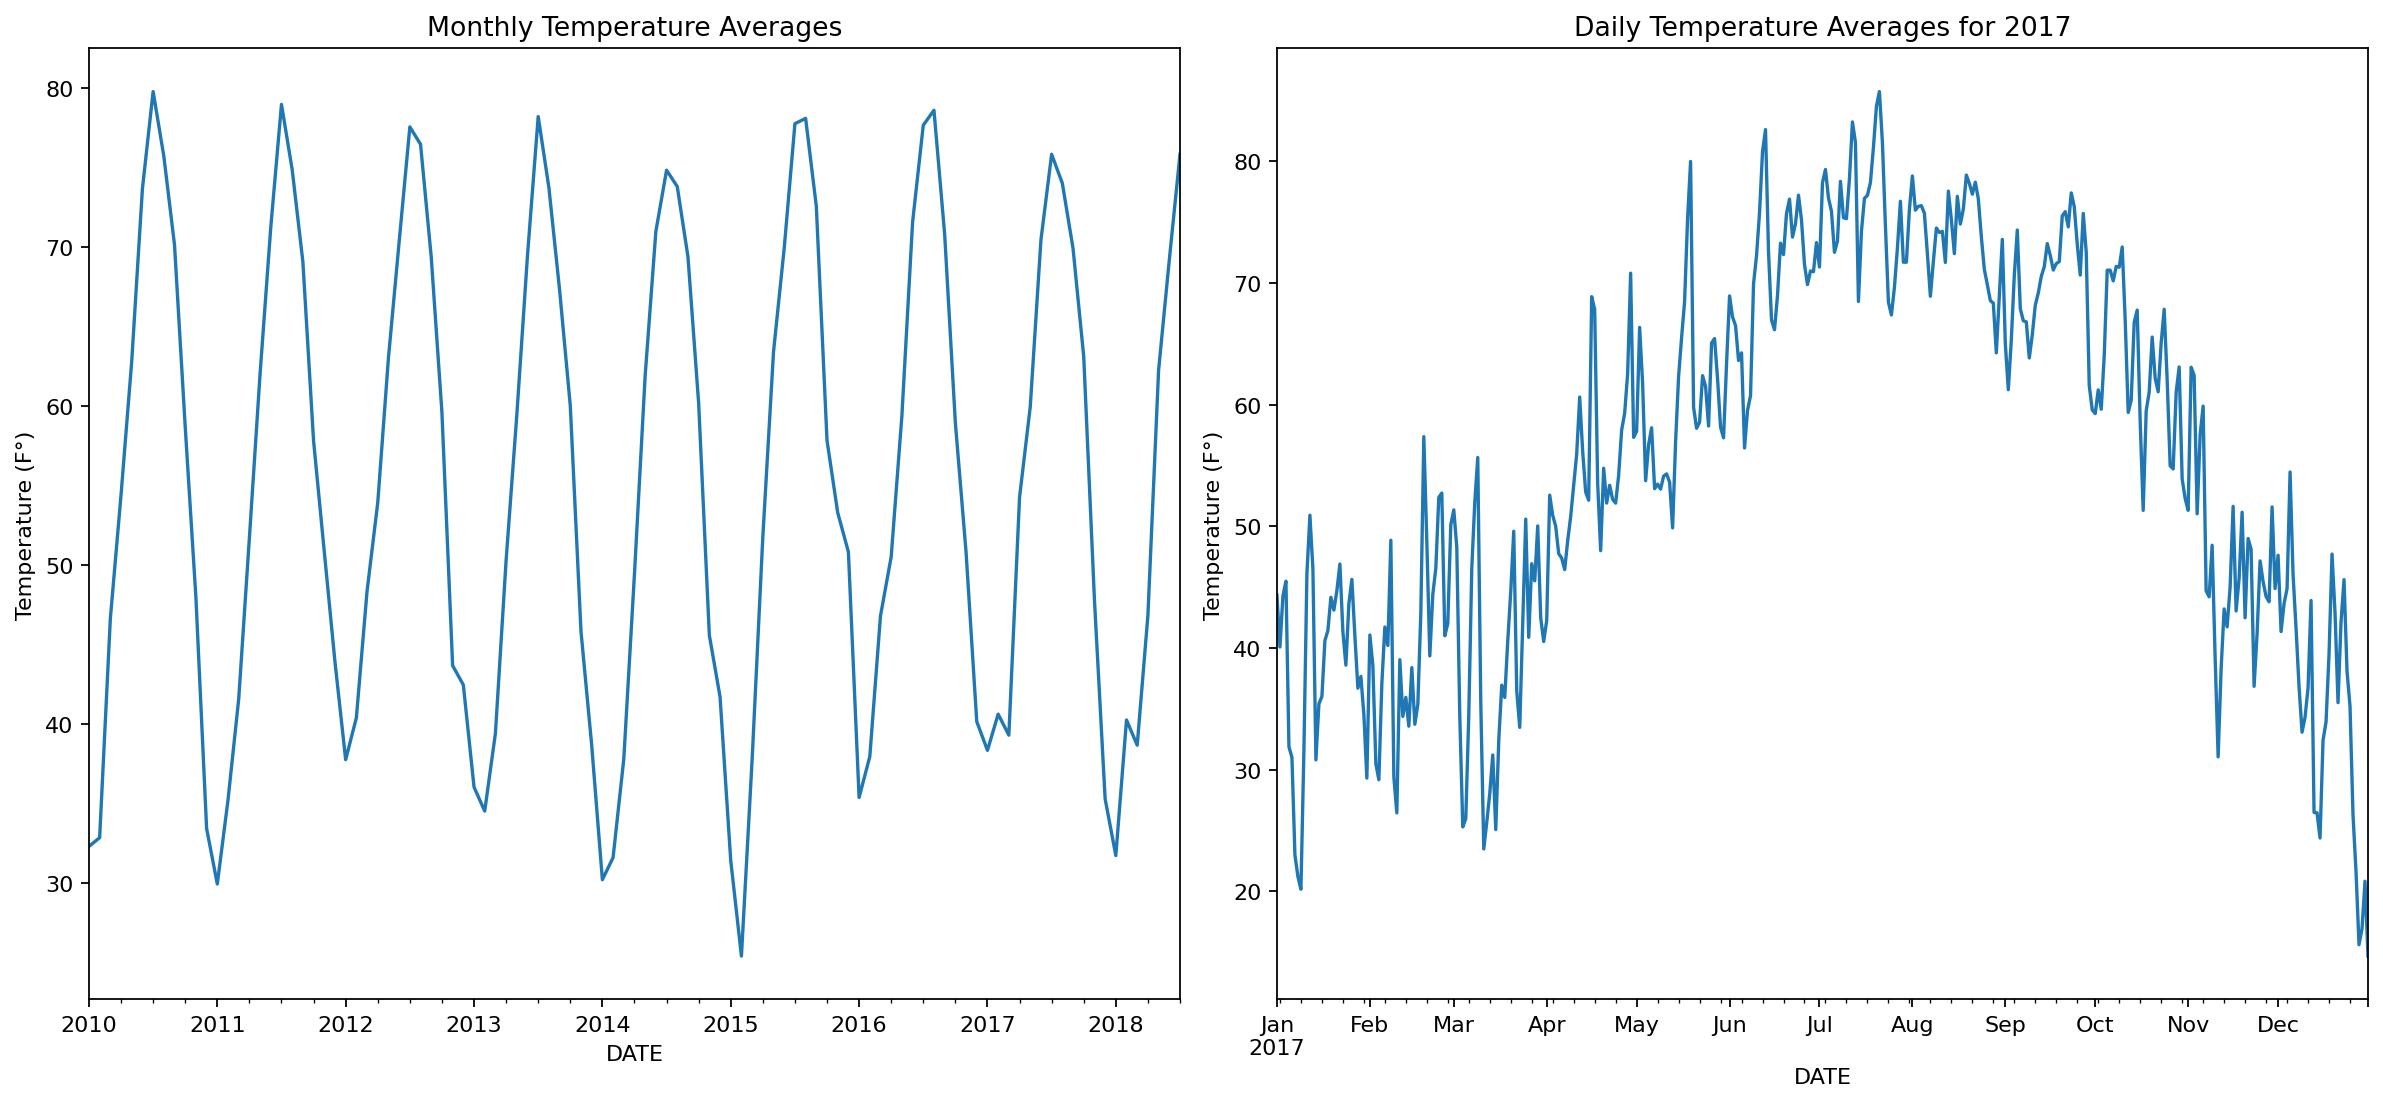

In [27]:
plt.figure(figsize=(15, 7))

TEMP_COL = 'dry_bulb_temp_f'

# Plot temperature data converted to a monthly frequency
plt.subplot(1,2,1)
data[TEMP_COL].resample('M').mean().plot()
plt.title('Monthly Temperature Averages')
plt.ylabel('Temperature (F°)')

# Daily frequency for a year
plt.subplot(1,2,2)
data[TEMP_COL]['2017'].resample('D').mean().plot()
plt.title('Daily Temperature Averages for 2017')
plt.ylabel('Temperature (F°)')

plt.tight_layout()
plt.show()


Next, we plot the change (delta) in temperature and notice that it is lowest around the middle of the year. That is expected behaviour as the gradient of the sinousoid near it's peak is zero.

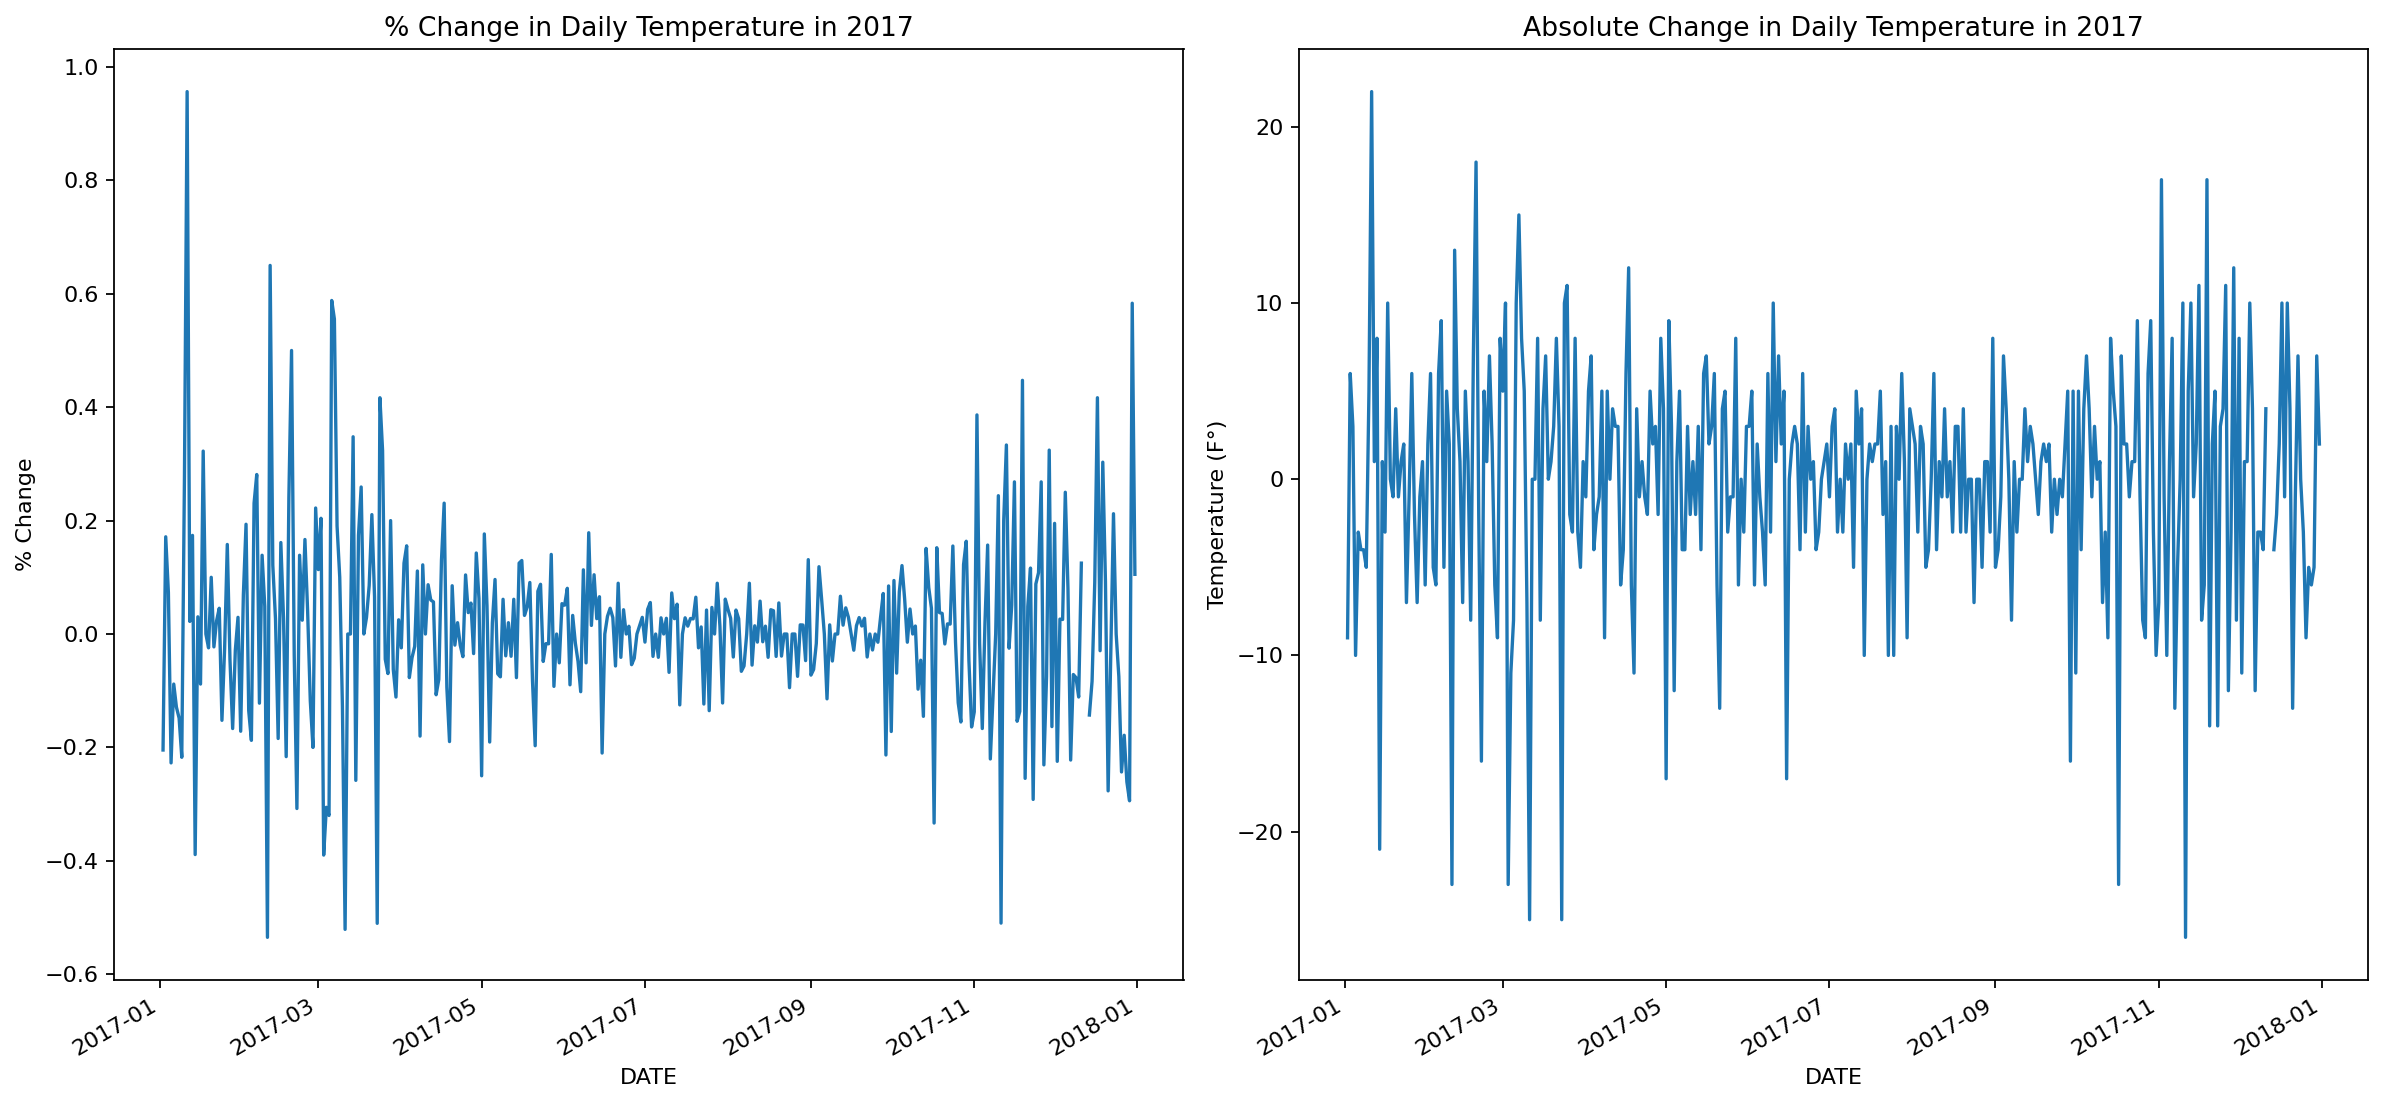

In [28]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1,2,1)
data[TEMP_COL]['2017'].asfreq('D').pct_change(fill_method=None).plot()
plt.title("% Change in Daily Temperature in 2017")
plt.ylabel('% Change')

# Absolute change of temperaturein 2017 with daily freq
plt.subplot(1,2,2)

data[TEMP_COL]['2017'].asfreq('D').diff().plot()
plt.title("Absolute Change in Daily Temperature in 2017")
plt.ylabel("Temperature (F°)")

plt.tight_layout()
plt.show()

Finally we apply some smoothing to the dat ain the form of a rolling/moving average. This is the simplest form of denoising the data. As we can see from the pltos, the average (plotted in blue) roughly traces the sinousoid and is now much smoother. This can improve the accuracy of a regeression model trained to predict temperatures within a reasonable margin of error.

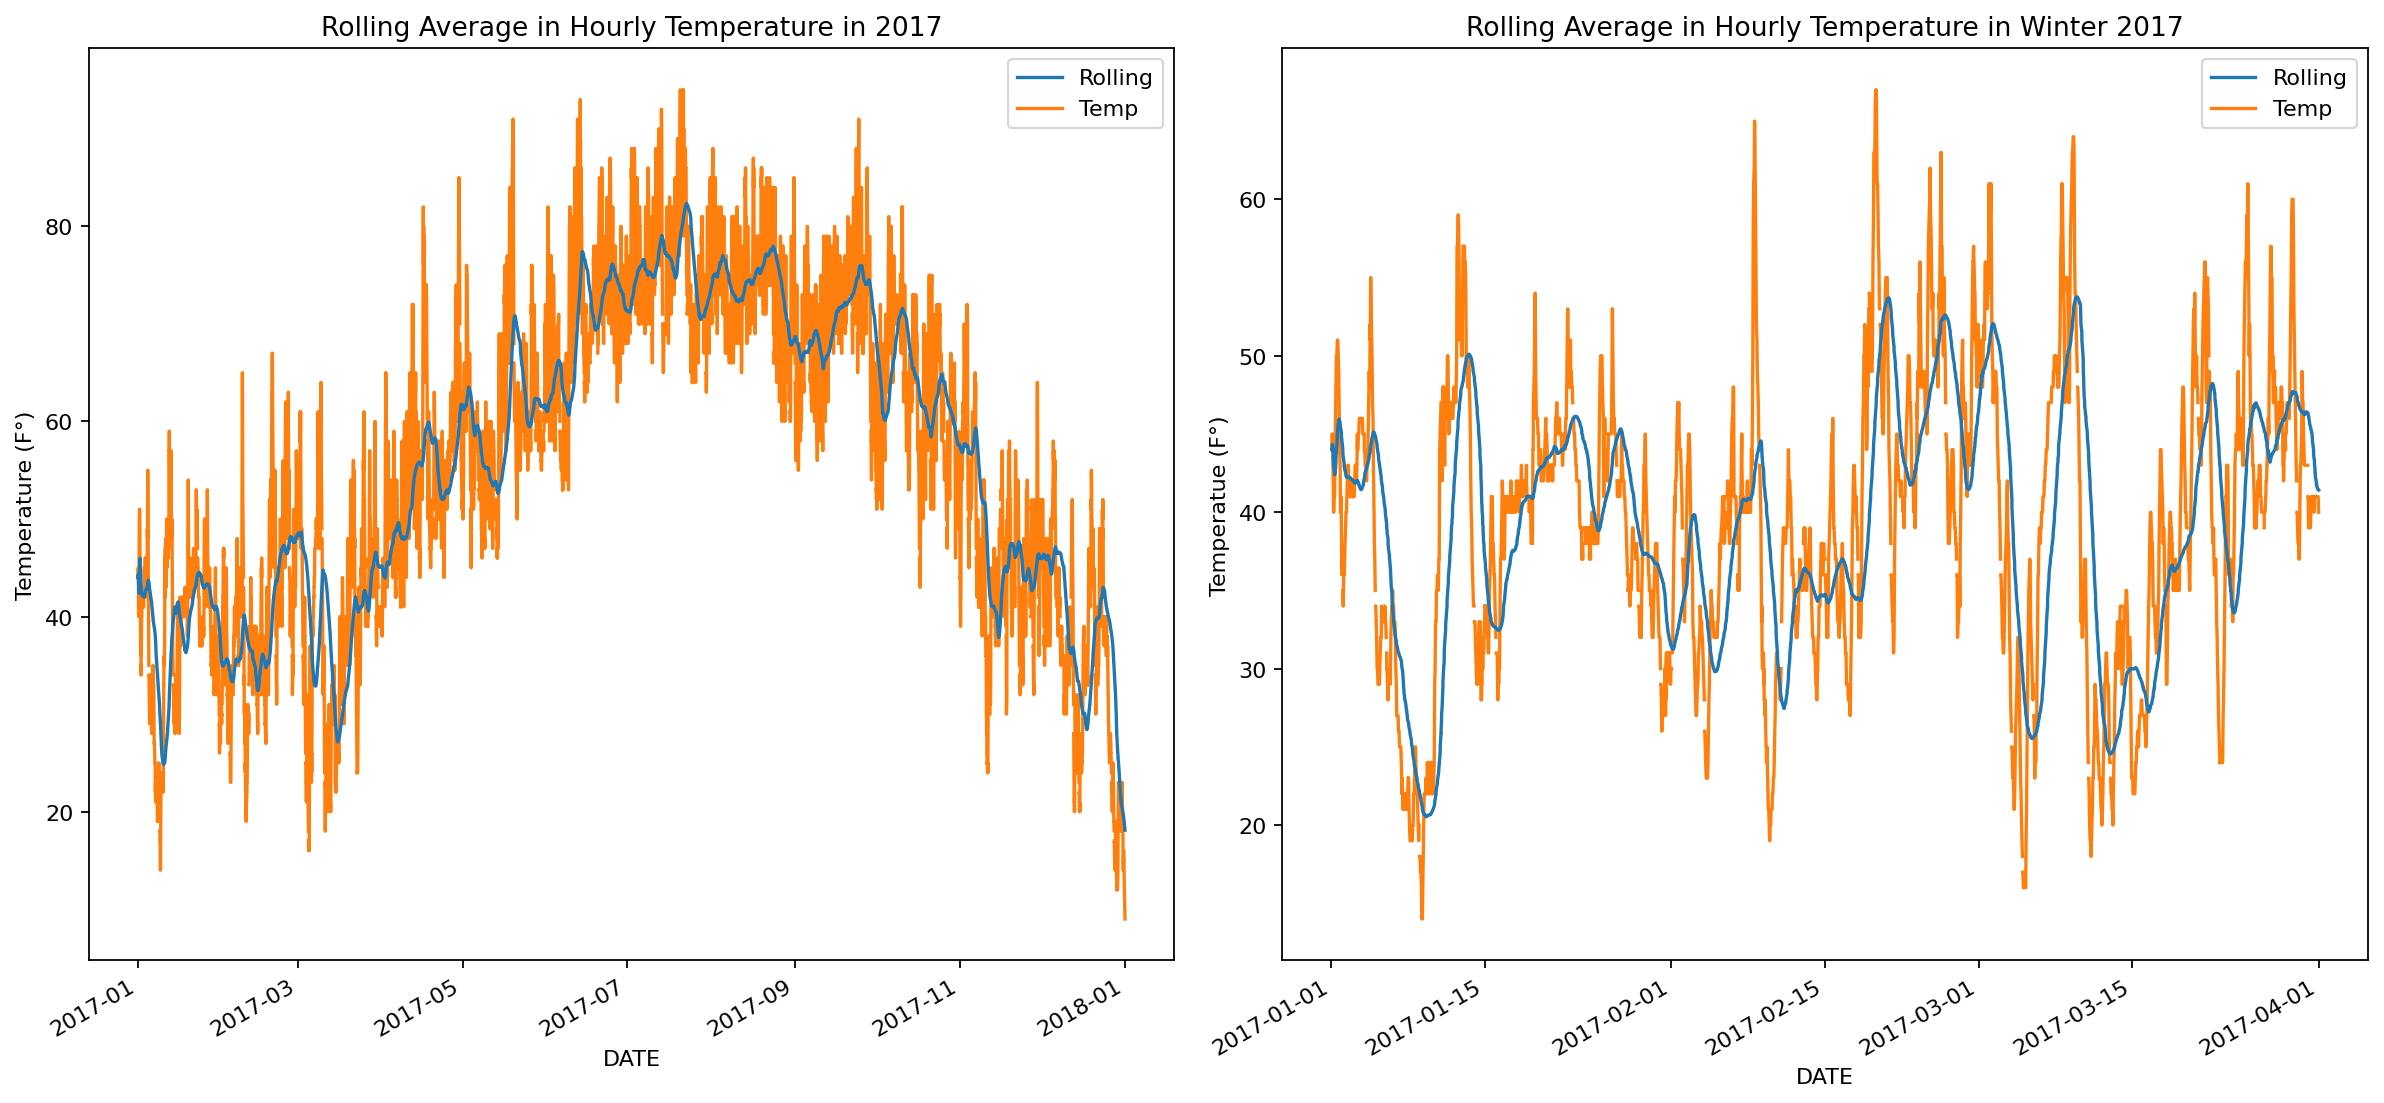

In [29]:
plt.figure(figsize=(15,7))

# Rolling mean of temp
plt.subplot(1,2,1)
data[TEMP_COL]['2017'].rolling('5D').mean().plot(zorder=2)  # 5-day rolling mean
data[TEMP_COL]['2017'].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title("Rolling Average in Hourly Temperature in 2017")
plt.ylabel("Temperature (F°)")

# Rolling mean of temperature for Jan-Mar 2017
plt.subplot(1,2,2)
data[TEMP_COL]['2017-01':'2017-03'].rolling('2D').mean().plot(zorder=2) # 2-day rolling mean
data[TEMP_COL]['2017-01':'2017-03'].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title("Rolling Average in Hourly Temperature in Winter 2017")
plt.ylabel("Temperatue (F°)")

plt.tight_layout()
plt.show()

---

## Part 3: Time Series Forecasting

In [30]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX